<a href="https://colab.research.google.com/github/troco-project/Veille-internationale-politiques-culturelles-des-diff-rents-pays-du-monde/blob/main/Festivals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
! jupyter nbconver -- execute -- to html

In [205]:
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats
from scipy.stats import norm
!pip install missingno
import missingno as mno
import openpyxl as op
import matplotlib.pyplot as plt
%matplotlib inline

In [206]:
# URL du fichier CSV
url_csv = "https://www.data.gouv.fr/fr/datasets/r/47ac11c2-8a00-46a7-9fa8-9b802643f975"

# Lire le fichier CSV depuis l'URL
df = pd.read_csv(url_csv, delimiter=';', error_bad_lines=False)

# Afficher le tableau
df.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_postal_de_la_commune_principale_de_deroulement,code_insee_commune,code_insee_epci_collage_en_valeur,libelle_epci_collage_en_valeur,numero_de_voie,type_de_voie_rue_avenue_boulevard_etc,nom_de_la_voie,adresse_postale,complement_d_adresse_facultatif,site_internet_du_festival,adresse_e_mail,decennie_de_creation_du_festival,annee_de_creation_du_festival,discipline_dominante,sous_categorie_spectacle_vivant,sous_categorie_musique,sous_categorie_musique_cnm,sous_categorie_cinema_et_audiovisuel,sous_categorie_arts_visuels_et_arts_numeriques,sous_categorie_livre_et_litterature,periode_principale_de_deroulement_du_festival,identifiant_agence_a,identifiant,geocodage_xy,identifiant_cnm
0,Tous courts,Départementale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Aix-en-Provence,13100,13001,200054807,Métropole d'Aix-Marseille-Provence,1,Place,John rewald,1 Place John rewald,Cité du livre,https://festivaltouscourts.com,laurence@festivaltouscourts.com,De 1980 à 1989,1982,"Cinéma, audiovisuel",NaN,NaN,NaN,Court métrage,NaN,NaN,Après-saison (6 septembre - 31 décembre),NaN,FEST_13001_71,"43.5360708378,5.39857444582",NaN
1,Les enchanteurs,Régionale,Hauts-de-France,Pas-de-Calais,Aix-Noulette,62160,62019,246200364,CA de Lens - Liévin,32,rue,de l'Abbé,32 rue de l'Abbé,NaN,https://www.festival-lesenchanteurs.com/,manon.defrancq@orange.fr,De 2000 à 2009,2001,Musique,NaN,Chanson ou variété française,01- Chanson,NaN,NaN,NaN,Avant-saison (1er janvier - 20 juin),NaN,FEST_62019_79,"50.4212424085,2.71263968704",NaN
2,Corsica polar,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,NaN,NaN,NaN,NaN,http://polarcorse.kazeo.com/,NaN,De 2000 à 2009,2006,"Cinéma, audiovisuel",NaN,NaN,NaN,NaN,NaN,Polar,Saison (21 juin - 5 septembre),NaN,FEST_2A004_83,"41.9347926638,8.70132275974",NaN
3,Festival international de la BD,Régional,Corse,Corse-du-Sud,Ajaccio,20000,2A004,242010056,CA du Pays Ajaccien,NaN,NaN,NaN,NaN,NaN,http://festivalbdajaccio.corsica/,NaN,De 1990 à 1999,1996,"Livre, littérature",NaN,NaN,NaN,NaN,NaN,Bande dessinée,Après-saison (6 septembre - 31 décembre),NaN,FEST_2A004_91,"41.9347926638,8.70132275974",NaN
4,Les estivales,Intercommunale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Allauch,13190,13002,200054807,Métropole d'Aix-Marseille-Provence,NaN,Montée,Trinière,Montée Trinière,NaN,https://www.allauch.com/,tourisme@mairie-carnoux.fr,De 2000 à 2009,NaN,Spectacle vivant,NaN,NaN,NaN,NaN,NaN,NaN,Saison (21 juin - 5 septembre),NaN,FEST_13002_155,"43.3533145712,5.51134767187",NaN


1. Informations générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7282 entries, 0 to 7281
Data columns (total 30 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   nom_du_festival                                      7282 non-null   object 
 1   envergure_territoriale                               1898 non-null   object 
 2   region_principale_de_deroulement                     7282 non-null   object 
 3   departement_principal_de_deroulement                 7256 non-null   object 
 4   commune_principale_de_deroulement                    7256 non-null   object 
 5   code_postal_de_la_commune_principale_de_deroulement  7265 non-null   object 
 6   code_insee_commune                                   7258 non-null   object 
 7   code_insee_epci_collage_en_valeur                    7246 non-null   object 
 8   libelle_epci_collage_en_

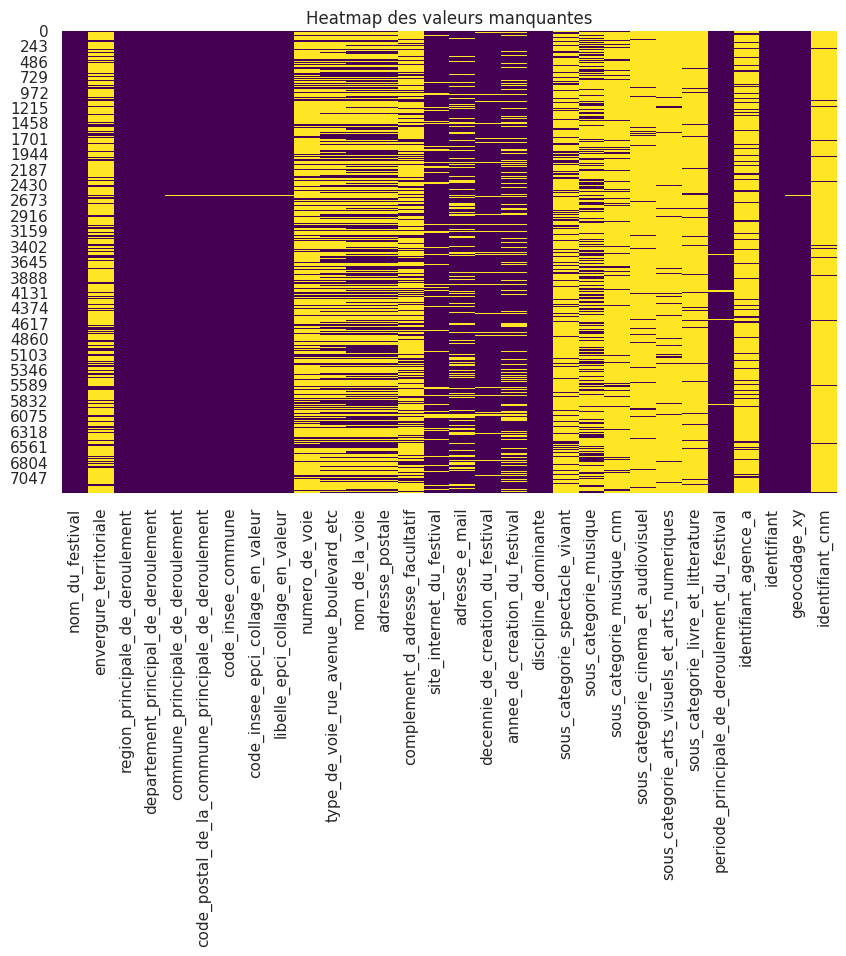

In [207]:
# Supposons que vous ayez déjà chargé votre DataFrame df

# 1. Informations générales sur le DataFrame
print("1. Informations générales sur le DataFrame:")
df_info = df.info()
print(df_info)

# 2. Statistiques descriptives
print("\n2. Statistiques descriptives:")
df_describe = df.describe(include='all')


# 3. Vérifier les valeurs manquantes
print("\n4. Vérifier les valeurs manquantes:")
missing_values = df.isnull().sum()
print(missing_values)

# 4. Identifier les valeurs uniques dans chaque colonne
print("\n8. Identifier les valeurs uniques dans chaque colonne:")
unique_values = df.nunique()
print(unique_values)

# 5. Visualiser les valeurs manquantes avec un graphique
print("\n5. Visualiser les valeurs manquantes avec un graphique:")
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap des valeurs manquantes')
plt.show()




In [208]:
# Convertir la colonne 'annee_de_creation_du_festival' en format de date
df['annee_de_creation_du_festival'] = pd.to_datetime(df['annee_de_creation_du_festival'], errors='coerce')


In [209]:
# Supprimer les colonnes à l'index spécifié
df_musique = df.drop(df.columns[[5, 7, 29, 26, 23, 24, 22, 19, 16, 11, 9, 10, 12, 13]], axis=1)

In [210]:
df_musique.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7282 entries, 0 to 7281
Data columns (total 16 columns):
 #   Column                                         Non-Null Count  Dtype         
---  ------                                         --------------  -----         
 0   nom_du_festival                                7282 non-null   object        
 1   envergure_territoriale                         1898 non-null   object        
 2   region_principale_de_deroulement               7282 non-null   object        
 3   departement_principal_de_deroulement           7256 non-null   object        
 4   commune_principale_de_deroulement              7256 non-null   object        
 5   code_insee_commune                             7258 non-null   object        
 6   libelle_epci_collage_en_valeur                 7246 non-null   object        
 7   site_internet_du_festival                      6557 non-null   object        
 8   adresse_e_mail                                 5578 non-nu

In [211]:
df_musique.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
0,Tous courts,Départementale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Aix-en-Provence,13001,Métropole d'Aix-Marseille-Provence,https://festivaltouscourts.com,laurence@festivaltouscourts.com,1982-01-01,"Cinéma, audiovisuel",NaN,NaN,Après-saison (6 septembre - 31 décembre),FEST_13001_71,"43.5360708378,5.39857444582"
1,Les enchanteurs,Régionale,Hauts-de-France,Pas-de-Calais,Aix-Noulette,62019,CA de Lens - Liévin,https://www.festival-lesenchanteurs.com/,manon.defrancq@orange.fr,2001-01-01,Musique,Chanson ou variété française,01- Chanson,Avant-saison (1er janvier - 20 juin),FEST_62019_79,"50.4212424085,2.71263968704"
2,Corsica polar,Régional,Corse,Corse-du-Sud,Ajaccio,2A004,CA du Pays Ajaccien,http://polarcorse.kazeo.com/,NaN,2006-01-01,"Cinéma, audiovisuel",NaN,NaN,Saison (21 juin - 5 septembre),FEST_2A004_83,"41.9347926638,8.70132275974"
3,Festival international de la BD,Régional,Corse,Corse-du-Sud,Ajaccio,2A004,CA du Pays Ajaccien,http://festivalbdajaccio.corsica/,NaN,1996-01-01,"Livre, littérature",NaN,NaN,Après-saison (6 septembre - 31 décembre),FEST_2A004_91,"41.9347926638,8.70132275974"
4,Les estivales,Intercommunale,Provence-Alpes-Côte d'Azur,Bouches-Du-Rhône,Allauch,13002,Métropole d'Aix-Marseille-Provence,https://www.allauch.com/,tourisme@mairie-carnoux.fr,NaT,Spectacle vivant,NaN,NaN,Saison (21 juin - 5 septembre),FEST_13002_155,"43.3533145712,5.51134767187"


In [212]:
# Utiliser loc pour sélectionner les lignes avec 'Musique'
df_musique_only = df_musique.loc[df_musique['discipline_dominante'].eq('Musique')].copy()

In [213]:
df_musique_only.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
1,Les enchanteurs,Régionale,Hauts-de-France,Pas-de-Calais,Aix-Noulette,62019,CA de Lens - Liévin,https://www.festival-lesenchanteurs.com/,manon.defrancq@orange.fr,2001-01-01,Musique,Chanson ou variété française,01- Chanson,Avant-saison (1er janvier - 20 juin),FEST_62019_79,"50.4212424085,2.71263968704"
7,Les musical'été,NaN,Auvergne-Rhône-Alpes,Haute-Savoie,Annemasse,74012,CA Annemasse-les Voirons-Agglomération,https://www.annemasse.fr/que-faire-a-annemasse/se-divertir/temps-forts/festival-les-musicalete,NaN,2006-01-01,Musique,"jazz, blues et musiques improvisées",NaN,Saison (21 juin - 5 septembre),FEST_74012_275,"46.1909730986,6.24250704322"
9,Team Peace Festival,NaN,Pays de la Loire,Mayenne,Argentré,53007,CA Laval Agglomération,https://www.hureaubooking.fr/team-peace-festival/,gaetan.bihel@gmail.com,2018-01-01,Musique,"Chanson ou variété française, Hip-hop, rap, slam, Métal, hard rock, Musiques du monde, Musiques électroniques, techno, Pop, rock, Reggae , Folk",07- Musiques actuelles sans distinction,Avant-saison (1er janvier - 20 juin),FEST_53007_335,"48.0906663644,-0.632122843282"
13,Festival d'art choral : Cantagora,NaN,Bourgogne-Franche-Comté,Saône-et-Loire,Autun,71014,CC du Grand Autunois Morvan,NaN,sophie.debouverie@orange.fr,2018-01-01,Musique,NaN,NaN,Saison (21 juin - 5 septembre),FEST_71014_483,"46.945536773,4.31060069532"
15,Catalpa festival,NaN,Bourgogne-Franche-Comté,Yonne,Auxerre,89024,CC Bresse Haute Seille,www.lesilex.fr,administration@lesilex.fr // direction@lesilex.fr,2012-01-01,Musique,"Chanson ou variété française, Pop, rock, Variétés internationales",07- Musiques actuelles sans distinction,Saison (21 juin - 5 septembre),FEST_89024_492,"47.793488225,3.58168281761"


In [214]:
df_musique_only.shape

(3228, 16)

In [215]:
# Supposons que df_musique_only soit votre DataFrame
unique_values = df_musique_only['sous_categorie_musique'].nunique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique' :
757


In [216]:
# Supposons que df_musique_only soit votre DataFrame
unique_values = df_musique_only['sous_categorie_musique'].unique()

# Afficher les valeurs uniques
print("Valeurs uniques dans les colonne sous_categorie_musique' :")
print(unique_values)


Valeurs uniques dans les colonne sous_categorie_musique' :
['Chanson ou variété française' 'jazz, blues et musiques improvisées'
 'Chanson ou variété française, Hip-hop, rap, slam, Métal, hard rock, Musiques du monde, Musiques électroniques, techno, Pop, rock, Reggae , Folk'
 nan 'Chanson ou variété française, Pop, rock, Variétés internationales'
 "Musique savante (musique ancienne, classique, contemporaine autour de l'orgue)"
 'Musiques actuelles'
 'Hip-hop, rap, slam, Métal, hard rock, Musique contemporaine, Musiques électroniques, techno, Pop, rock'
 'Musiques classiques'
 'Chanson ou variété française, Jazz, blues, Musique classique, Musiques du monde, Musiques traditionnelles, Opéra, Gospel, pop/rock en orchestre symphonique, ensemble vocal a cappella international'
 'Métal, hard rock, Pop, rock, Jazz, blues'
 'Chanson ou variété française Musiques du monde Pop, rock Jazz, blues'
 'Musique classique' 'Jazz, Blues' 'Musique classique, Musique sacrée'
 'Musiques classiques et savant

In [217]:
def filter_words(dataframe, column, words):
    # Convertir les mots en minuscules pour une recherche insensible à la casse
    words = [str(word).lower() for word in words]

    # Créer un masque pour les lignes contenant au moins un des mots spécifiés
    mask = dataframe[column].apply(lambda x: isinstance(x, str) and any(word in str(x).lower() for word in words))

    # Appliquer le masque et réinitialiser l'index du nouveau DataFrame
    filtered_df = dataframe[mask].reset_index(drop=True)

    return filtered_df

# Utiliser la fonction pour filtrer les lignes contenant 'contemporaine' et 'monde'
df_filtered = filter_words(df_musique_only, 'sous_categorie_musique', ['contemporaine', 'monde','actuelles'])

# Afficher le DataFrame filtré
print(df_filtered)

          nom_du_festival       envergure_territoriale  \
0           Team Peace Festival           NaN            
1     Les Automnales de l'Orgue           NaN            
2                 Festi'pérouze           NaN            
3           Complètement Barges           NaN            
4                    Festa Maio           NaN            
...                         ...                    ...   
1095       Festival des Balkans           NaN            
1096          Vryche sur Yvette           NaN            
1097      Jazz(S) A Trois Palis           NaN            
1098           Les concerts tôt           NaN            
1099           Entente Nocturne           NaN            

     region_principale_de_deroulement departement_principal_de_deroulement  \
0                 Pays de la Loire                     Mayenne               
1       Provence-Alpes-Côte d'Azur                    Vaucluse               
2             Auvergne-Rhône-Alpes                         Ain       

In [218]:
df_filtered.head()

,nom_du_festival,envergure_territoriale,region_principale_de_deroulement,departement_principal_de_deroulement,commune_principale_de_deroulement,code_insee_commune,libelle_epci_collage_en_valeur,site_internet_du_festival,adresse_e_mail,annee_de_creation_du_festival,discipline_dominante,sous_categorie_musique,sous_categorie_musique_cnm,periode_principale_de_deroulement_du_festival,identifiant,geocodage_xy
0,Team Peace Festival,NaN,Pays de la Loire,Mayenne,Argentré,53007,CA Laval Agglomération,https://www.hureaubooking.fr/team-peace-festival/,gaetan.bihel@gmail.com,2018-01-01,Musique,"Chanson ou variété française, Hip-hop, rap, slam, Métal, hard rock, Musiques du monde, Musiques électroniques, techno, Pop, rock, Reggae , Folk",07- Musiques actuelles sans distinction,Avant-saison (1er janvier - 20 juin),FEST_53007_335,"48.0906663644,-0.632122843282"
1,Les Automnales de l'Orgue,NaN,Provence-Alpes-Côte d'Azur,Vaucluse,Avignon,84007,CA du Grand Avignon (COGA),www.musique-sacree-en-avignon.org,contact@musique-sacree-en-avignon.org,1993-01-01,Musique,"Musique savante (musique ancienne, classique, contemporaine autour de l'orgue)",NaN,Après-saison (6 septembre - 31 décembre),FEST_84007_532,"43.9352448339,4.84071572505"
2,Festi'pérouze,NaN,Auvergne-Rhône-Alpes,Ain,Bâgé-Dommartin,01025,CC Bresse et Saône,www.cultivonslaperouze.org,contact@cultivonslaperouze.org,2016-01-01,Musique,Musiques actuelles,NaN,Après-saison (6 septembre - 31 décembre),FEST_01025_564,"46.3233203302,4.9528678933"
3,Complètement Barges,NaN,Bourgogne-Franche-Comté,Côte-d'Or,Barges,21048,CC de Gevrey-Chambertin et de Nuits-Saint-Georges,https://completementbarges.wixsite.com/,completement.barges@gmail.com,2019-01-01,Musique,"Hip-hop, rap, slam, Métal, hard rock, Musique contemporaine, Musiques électroniques, techno, Pop, rock",NaN,Saison (21 juin - 5 septembre),FEST_21048_618,"47.2092455725,5.05951734595"
4,Festa Maio,NaN,Corse,Corse-du-Sud,Bastia,2B033,CA de Bastia,https://festamaio.corsica/,NaN,2019-01-01,Musique,Musiques actuelles,NaN,Saison (21 juin - 5 septembre),FEST_2B033_642,"42.6864768806,9.42502133338"


In [219]:
# Supposons que 'df_filtered' est votre DataFrame

# Utilisez la méthode unique() pour obtenir les valeurs uniques de la colonne 'region_principale_de_deroulement'
regions_uniques = df_filtered['region_principale_de_deroulement'].unique()

# Affichez les valeurs uniques
print(regions_uniques)

['Pays de la Loire' "Provence-Alpes-Côte d'Azur" 'Auvergne-Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Corse' 'Normandie' 'Nouvelle-Aquitaine'
 'Île-de-France' 'Bretagne' 'Centre-Val de Loire' 'Hauts-de-France'
 'Grand Est' 'Occitanie' 'La Réunion' 'Mayotte' 'Guyane'
 'Nouvelle-Calédonie']


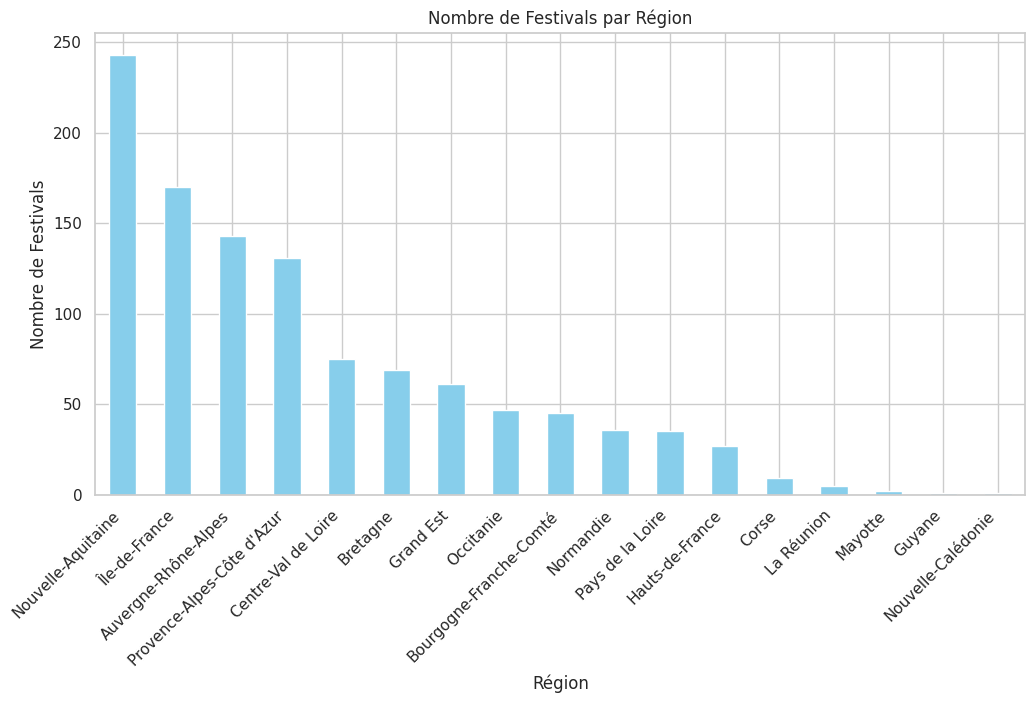

In [220]:
# Supposons que 'df_filtered' est votre DataFrame
# Vous pouvez remplacer cela par le nom réel de votre DataFrame
# Assurez-vous que la colonne 'region_principale_de_deroulement' existe dans votre DataFrame

# Grouper le nombre de festivals par région
festivals_par_region = df_filtered['region_principale_de_deroulement'].value_counts()

# Créer un graphique à barres
plt.figure(figsize=(12, 6))
festivals_par_region.plot(kind='bar', color='skyblue')
plt.title('Nombre de Festivals par Région')
plt.xlabel('Région')
plt.ylabel('Nombre de Festivals')
plt.xticks(rotation=45, ha='right')  # Pour une meilleure lisibilité des étiquettes
plt.show()

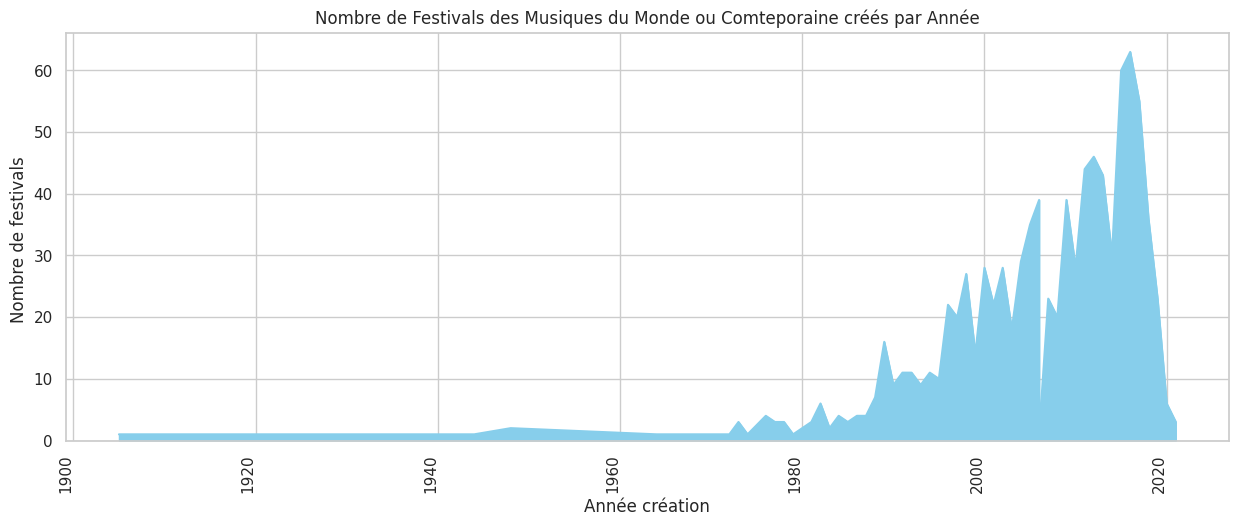

In [221]:
# Supposons que 'df_filtered' est votre DataFrame
# Vous pouvez remplacer cela par le nom réel de votre DataFrame
# Assurez-vous que la colonne 'annee_de_creation_du_festival' existe dans votre DataFrame

# Grouper les festivals par année de création
festivals_par_annee = df_filtered['annee_de_creation_du_festival'].value_counts().sort_index()

# Créer un graphique en utilisant un graphique à barres
plt.figure(figsize=(15, 6))
festivals_par_annee.plot(kind='area', color='skyblue')
plt.title('Nombre de Festivals des Musiques du Monde ou Comteporaine créés par Année')
plt.xlabel('Année création')
plt.ylabel('Nombre de festivals ')
plt.xticks(rotation=90, ha='right')  # Pour une meilleure lisibilité des étiquettes
plt.show()

In [222]:
df_filtres.shape

(29, 3)

In [229]:
# Convertir la colonne 'annee_de_creation_du_festival' en format de date
df_filtered['annee_de_creation_du_festival'] = pd.to_datetime(df_filtered['annee_de_creation_du_festival'], errors='coerce')

# Choisir les colonnes à afficher
colonnes_a_afficher = ['nom_du_festival', 'annee_de_creation_du_festival', 'site_internet_du_festival']

# Filtrer les festivals créés entre 1900 et 1980 en choisissant les colonnes à afficher
df_filtres = df_filtered.loc[(df_filtered['annee_de_creation_du_festival'] >= '1900-01-01') & (df_filtered['annee_de_creation_du_festival'] <= '1980-12-31'), colonnes_a_afficher]

# Trier les festivals par année de création de manière ascendante
df_filtres = df_filtres.sort_values(by='annee_de_creation_du_festival', ascending=True)

# Afficher les festivals filtrés avec les colonnes sélectionnées, triés par année de création ascendante
print(df_filtres)



                                 nom_du_festival                              \
1030                                               Festival des Filets Bleus   
441                                                              Cornouaille   
849                                                    Festival de Royaumont   
604                                               Festival d'Aix-en-provence   
59               Festival international de musique de Besançon Franche-Comté   
167                                          Festival de la Grange de Meslay   
483                                           Festival de Boucard Haut-Berry   
981                          Cycle de musiques sacrées du festival d'avignon   
640                                                          Jazz en Liberté   
714                                                  Festival de Saint-Denis   
76                                  Cycle Musical de la Chapelle de Kersaint   
491                                     

# Nouvelle section